In [41]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms 

from functions import *

from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))


In [42]:
original = torch.load('data/dataset_distlognorm_massnorm.pt')
transform = transforms.Resize((29, 10))

### all models are trained with 200 eocihs, T = 1000 and linear scheduler

# interpolation = NEAREST

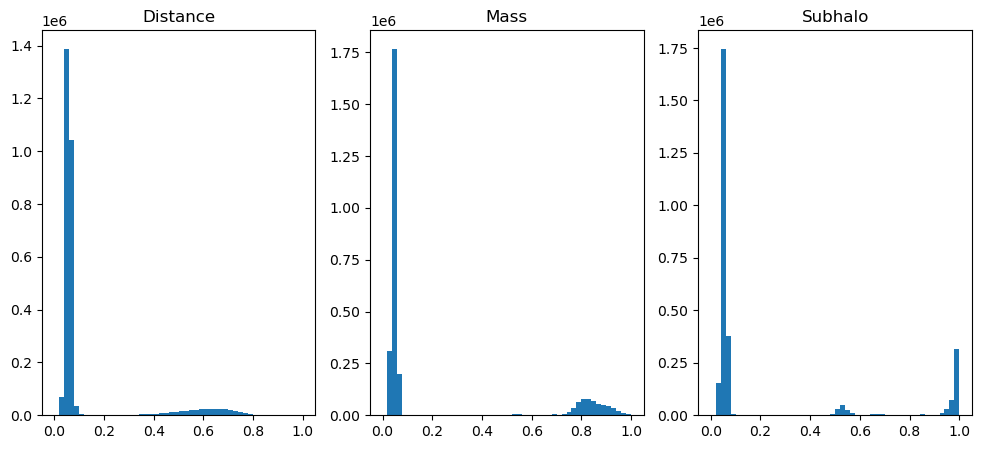

In [43]:
nearest = torch.load("../testing/interpolation/generated_image__NEAREST_T=1000_linear.pt", map_location = "cpu")
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])

dist = nearest[:, 0]
mass = nearest[:, 1]
subh = nearest[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [44]:
# dist
print("dist:")
lower_threshold = 0.25
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.4
upper_threshold = 0.5
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.25
upper_threshold = 0.35
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.75
upper_threshold = 0.80
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.25 and 0.3: 0.09%

mass:
Percentage of values between 0.4 and 0.5: 0.02%

subh:
Percentage of values between 0.25 and 0.35: 0.05%

Percentage of values between 0.75 and 0.8: 0.01%



In [45]:
nearest = torch.load("../testing/interpolation/generated_image__NEAREST_T=1000_linear.pt", map_location = "cpu")
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])
nearest = transform_diffusion_image(nearest, d_thresh = 0.3, m_tresh = 0.45, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = nearest[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 0.84%



In [12]:
full_evaluation(nearest, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 45.79%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 96.57%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  31.80%
inconsistency due to zgap in branch 5.46%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 1779, which is  32.82%
That corresponds to 17.79% of all images


Of all images, 52.35% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 17.24% have gap between branches inconsistency
Of all images, 2.96% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-------------------------------------

In [47]:
total = check_branch_length(nearest, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        if len(con) > 0:
            check_branch_length(con)
        



Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  100.00%
inconsistency due to zgap in branch 0.00%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 0, which is  0.00%
That corresponds to 0.00% of all images


Of all images, 0.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 100.00% have gap between branches inconsistency
Of all images, 0.00% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


Percentage of consistant images = 44.19%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 62.50%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  62.50%
inconsistency due to zgap in branch 8



Percentage of consistant images = 31.27%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 99.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  36.67%
inconsistency due to zgap in branch 4.83%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 236, which is  39.33%
That corresponds to 27.03% of all images


Of all images, 68.04% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 25.20% have gap between branches inconsistency
Of all images, 3.32% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches

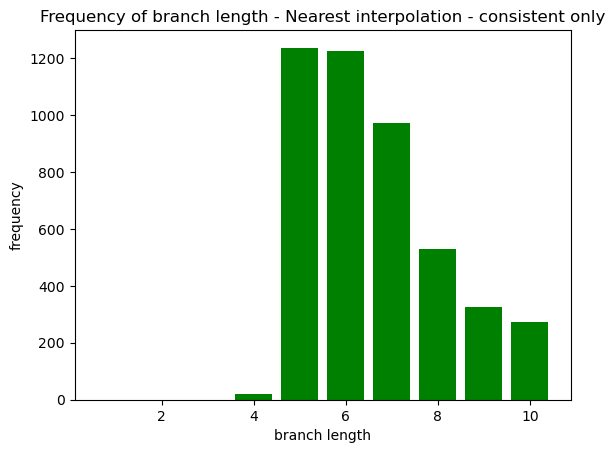

In [11]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 19, 1236, 1224, 972, 530, 325, 273]

plt.bar(num_branches, length, color = "g")

# Add title and labels
plt.title('Frequency of branch length - Nearest interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')
plt.savefig("4")

# Show the plot
plt.show()

# interpolation = NEAREST EXACT

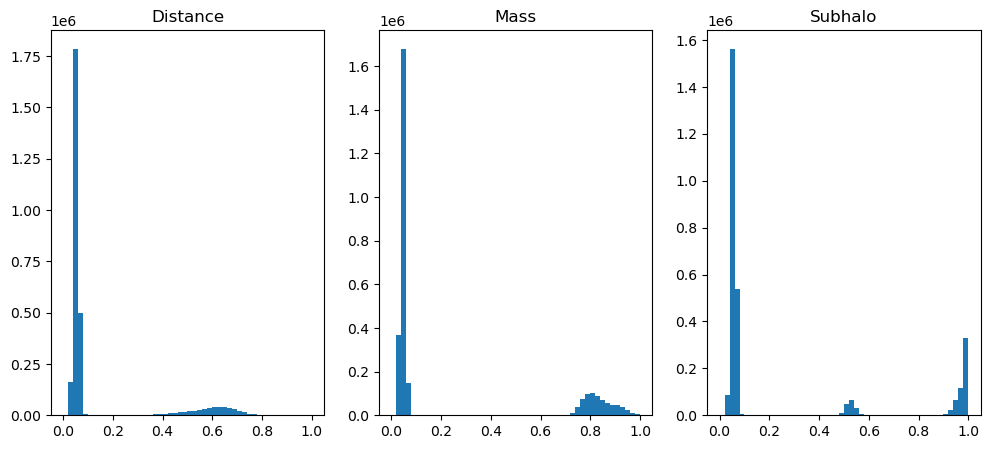

In [48]:
nearest_exact = torch.load("../testing/interpolation/generated_image_NEAREST_EXACT_T=1000_linear.pt", map_location = "cpu")
nearest_exact = transform(nearest_exact.to(dtype=torch.float))
nearest_exact = normalize(nearest_exact, True, [0, 1, 2])

dist = nearest_exact[:, 0]
mass = nearest_exact[:, 1]
subh = nearest_exact[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [49]:
# dist
print("dist:")
lower_threshold = 0.1
upper_threshold = 0.21
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.09
upper_threshold = 0.69
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.10
upper_threshold = 0.47
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.60
upper_threshold = 0.89
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.1 and 0.21: 0.00%

mass:
Percentage of values between 0.09 and 0.69: 0.00%

subh:
Percentage of values between 0.1 and 0.47: 0.00%

Percentage of values between 0.6 and 0.89: 0.00%



In [50]:
nearest_exact = torch.load("../testing/interpolation/generated_image_NEAREST_EXACT_T=1000_linear.pt", map_location = "cpu")
nearest_exact = transform(nearest_exact.to(dtype=torch.float))
nearest_exact = normalize(nearest_exact, True, [0, 1, 2])
nearest_exact = transform_diffusion_image(nearest_exact, d_thresh = 0.18, m_tresh = 0.6, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = nearest_exact[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 0.01%



In [16]:
full_evaluation(nearest_exact, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 61.17%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 89.49%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  20.47%
inconsistency due to zgap in branch 8.29%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 680, which is  17.51%
That corresponds to 6.80% of all images


Of all images, 34.75% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 7.95% have gap between branches inconsistency
Of all images, 3.22% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------------

In [51]:
total = check_branch_length(nearest_exact, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        if len(con) > 0:
            check_branch_length(con)
        



Percentage of consistant images = 4.35%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 40.91%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  86.36%
inconsistency due to zgap in branch 9.09%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 7, which is  31.82%
That corresponds to 30.43% of all images


Of all images, 39.13% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 82.61% have gap between branches inconsistency
Of all images, 8.70% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 1
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is

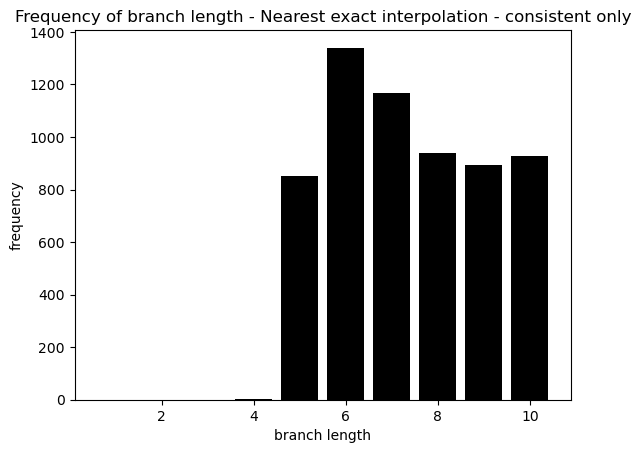

In [10]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 1, 852, 1340, 1166, 938, 893, 927]

plt.bar(num_branches, length, color = "black")

# Add title and labels
plt.title('Frequency of branch length - Nearest exact interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')
plt.savefig("3")
# Show the plot
plt.show()

# interpolation = BILINEAR


In [25]:
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data, ks_test

bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])
bilinear = transform_diffusion_image(bilinear, d_thresh = 0.3, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)
cons, incons = check_consistency(bilinear)



Percentage of consistant images = 60.89%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 95.83%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  22.81%
inconsistency due to zgap in branch 7.62%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 1004, which is  25.67%
That corresponds to 10.04% of all images


Of all images, 37.48% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 8.92% have gap between branches inconsistency
Of all images, 2.98% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


In [30]:
data = torch.cat([cons, cons, cons, cons, cons])
data.shape

torch.Size([30445, 3, 29, 10])

Real images:


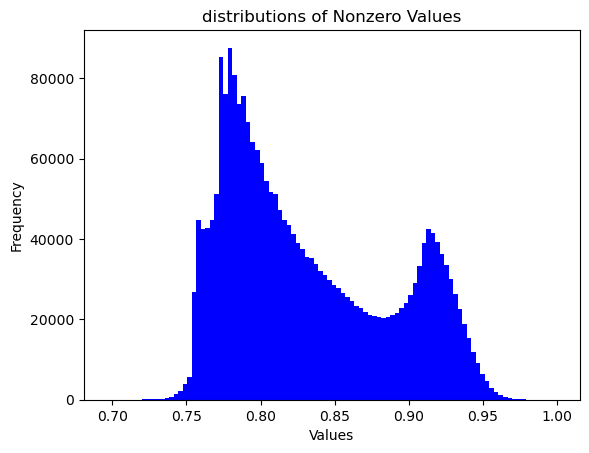

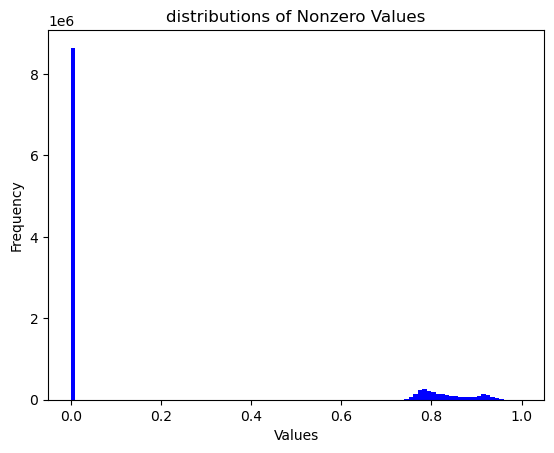

number of nonzero values = 2475374
Generated images:


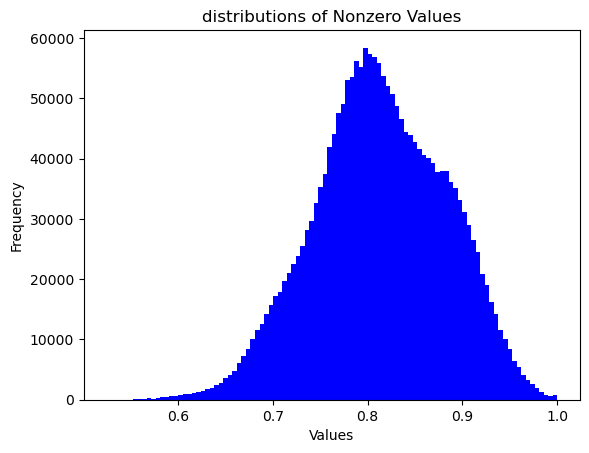

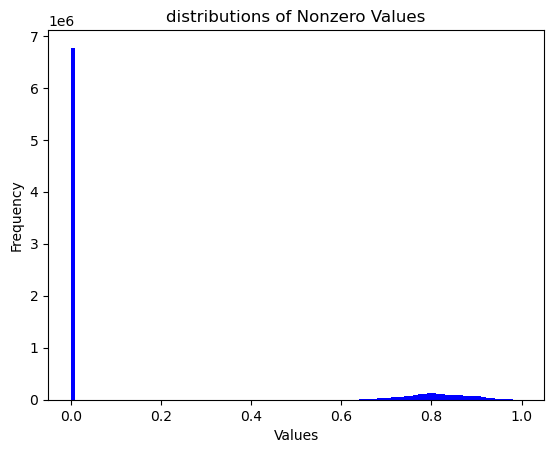

number of nonzero values = 2058065


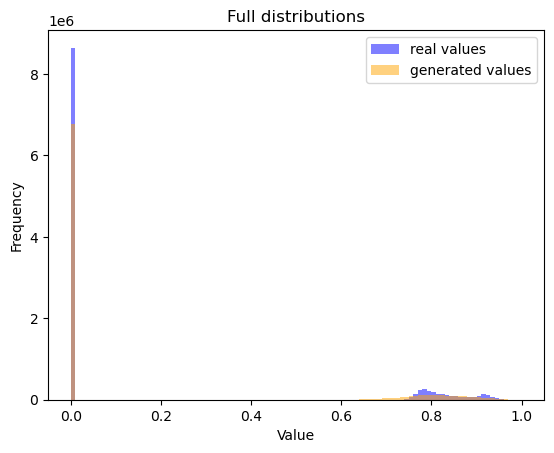

Full distribution:
KS Statistic: 0.03408814805039995
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.0341 > 0.0006


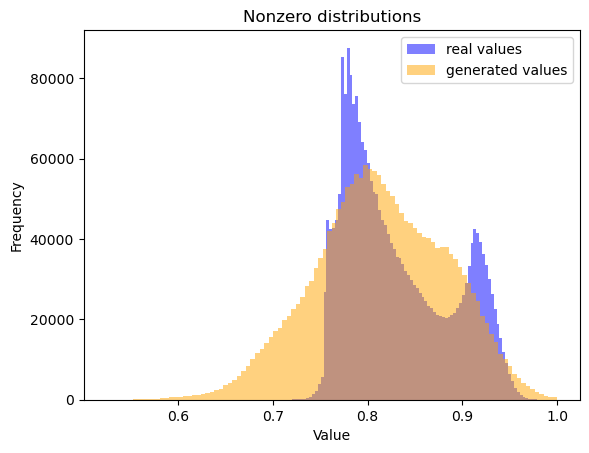

Nonzero distribution:
KS Statistic: 0.19101498707050138
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0013:
The distributions are significantly different (reject H0), KS statistic 0.1910 > 0.0013


(0.03408814805039995, 0.19101498707050138)

In [31]:
ks_test(original, data, dim = 1)

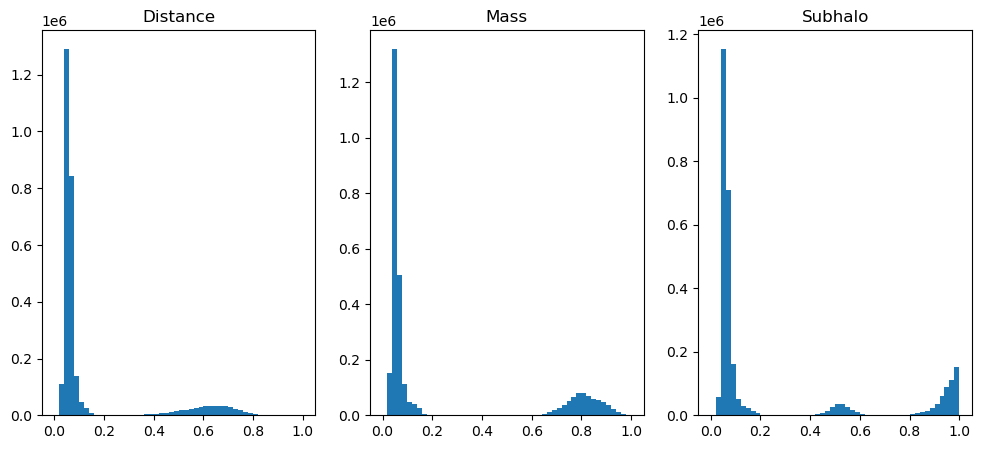

In [52]:
bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])

dist = bilinear[:, 0]
mass = bilinear[:, 1]
subh = bilinear[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [53]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.5
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.25
upper_threshold = 0.35
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.73
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.3: 0.06%

mass:
Percentage of values between 0.2 and 0.5: 0.00%

subh:
Percentage of values between 0.25 and 0.35: 0.00%

Percentage of values between 0.7 and 0.73: 0.00%



In [54]:
bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])
bilinear = transform_diffusion_image(bilinear, d_thresh = 0.25, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)

original_min = 0.6985
mass = bilinear[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 1.35%



In [20]:
full_evaluation(bilinear, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 69.15%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 94.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  12.06%
inconsistency due to zgap in branch 8.82%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 445, which is  14.42%
That corresponds to 4.45% of all images


Of all images, 29.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 3.72% have gap between branches inconsistency
Of all images, 2.72% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------------

In [55]:
total = check_branch_length(bilinear, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        if len(con) > 0:
            check_branch_length(con)
        



Percentage of consistant images = 16.67%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 80.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  40.00%
inconsistency due to zgap in branch 20.00%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 2, which is  40.00%
That corresponds to 33.33% of all images


Of all images, 66.67% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 33.33% have gap between branches inconsistency
Of all images, 16.67% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 1
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches

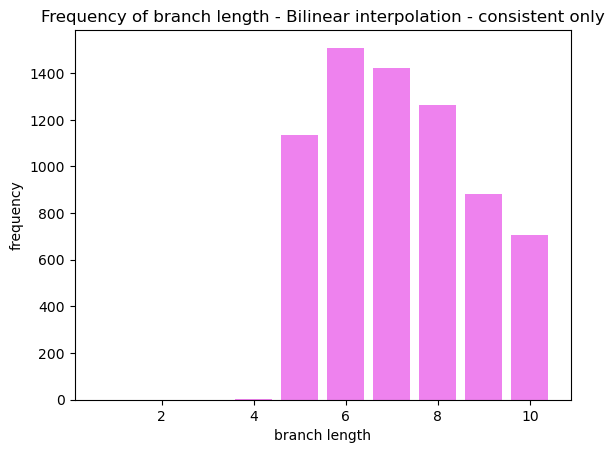

In [9]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 1, 1136, 1509, 1420, 1262, 880, 707]

plt.bar(num_branches, length, color = "violet")

# Add title and labels
plt.title('Frequency of branch length - Bilinear interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')
plt.savefig("2")

# Show the plot
plt.show()

# interpolation = BICUBIC


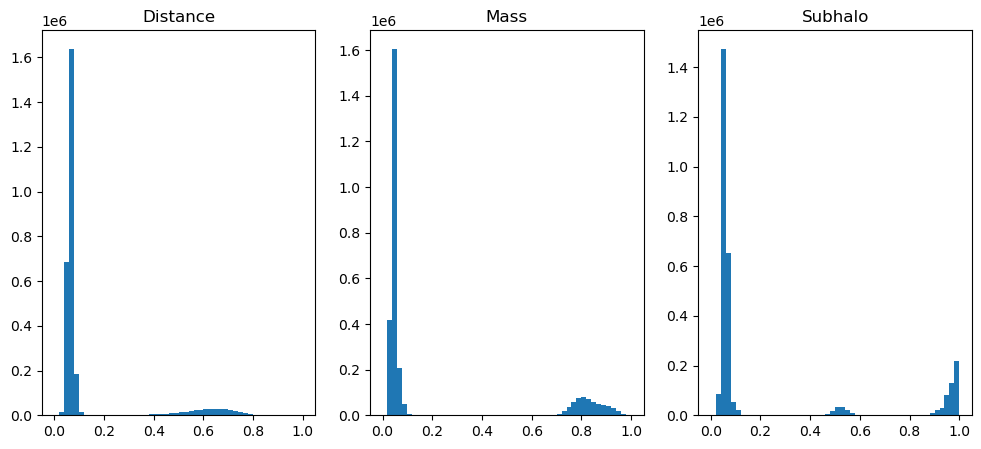

In [56]:
bicubic = torch.load("../testing/interpolation/generated_image_BICUBIC_T=1000_linear.pt", map_location = "cpu")
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])

dist = bicubic[:, 0]
mass = bicubic[:, 1]
subh = bicubic[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [57]:
# dist

print("dist:")
lower_threshold = 0.14
upper_threshold = 0.22
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.6
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.14
upper_threshold = 0.44
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.62
upper_threshold = 0.85
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.14 and 0.22: 0.00%

mass:
Percentage of values between 0.2 and 0.6: 0.00%

subh:
Percentage of values between 0.14 and 0.44: 0.00%

Percentage of values between 0.62 and 0.85: 0.00%



In [58]:
bicubic = torch.load("../testing/interpolation/generated_image_BICUBIC_T=1000_linear.pt", map_location = "cpu")
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])
bicubic = transform_diffusion_image(bicubic, d_thresh = 0.18, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)

original_min = 0.6958
mass = bicubic[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")


mass:
Percentage of values below 0.6958: 0.08%



In [24]:
full_evaluation(bicubic, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 71.11%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 93.94%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  11.60%
inconsistency due to zgap in branch 4.50%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 287, which is  9.93%
That corresponds to 2.87% of all images


Of all images, 27.14% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 3.35% have gap between branches inconsistency
Of all images, 1.30% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------------

In [59]:
total = check_branch_length(bicubic, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        if len(con) > 0:
            check_branch_length(con)
        



Percentage of consistant images = 80.00%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  0.00%
inconsistency due to zgap in branch 0.00%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 0, which is  0.00%
That corresponds to 0.00% of all images


Of all images, 20.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 0.00% have gap between branches inconsistency
Of all images, 0.00% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 4
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is: 



Percentage of consistant images = 63.45%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 98.28%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  9.48%
inconsistency due to zgap in branch 3.74%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 40, which is  11.49%
That corresponds to 4.20% of all images


Of all images, 35.92% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 3.47% have gap between branches inconsistency
Of all images, 1.37% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is:

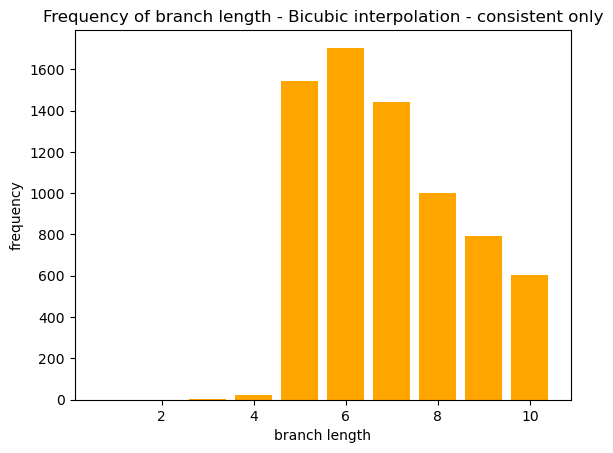

In [8]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 4, 23, 1541, 1704, 1442, 1000, 793, 604]

plt.bar(num_branches, length, color = "orange")

# Add title and labels
plt.title('Frequency of branch length - Bicubic interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')
plt.savefig("1")

# Show the plot
plt.show()

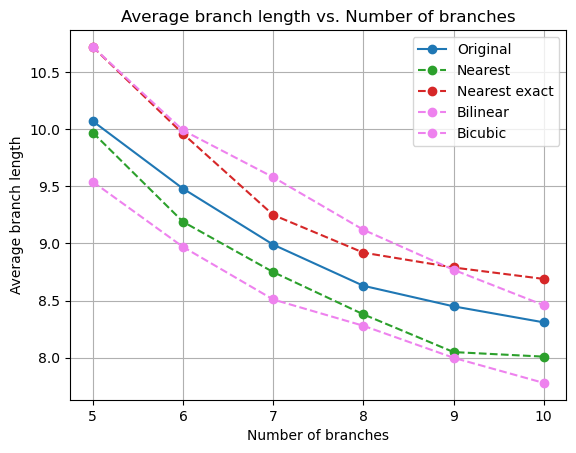

In [63]:
branches = [5, 6, 7, 8, 9, 10]
branch_length = [10.07, 9.48, 8.99, 8.63, 8.45, 8.31]
branch_length_N = [9.97, 9.19, 8.75, 8.38, 8.05, 8.01]
branch_length_NE = [10.72, 9.96, 9.25, 8.92, 8.79, 8.69]
branch_length_BIL =  [10.72, 9.99, 9.58, 9.12, 8.77, 8.46]
branch_length_BIC = [9.54, 8.97, 8.51, 8.28, 8.00, 7.78]



# Plot consistency and complexity
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of branches')
ax1.set_ylabel("Average branch length", color="black")
ax1.plot(branches, branch_length, color=color, marker='o', linestyle='-', label='Original')
ax1.tick_params(axis='y', labelcolor="black")

color = 'tab:green'
ax1.plot(branches, branch_length_N, color=color, marker='o', linestyle='--', label='Nearest')


color = 'tab:red'
ax1.plot(branches, branch_length_NE, color=color, marker='o', linestyle='--', label='Nearest exact')


color = 'tab:violet'
ax1.plot(branches, branch_length_BIL, color="violet", marker='o', linestyle='--', label='Bilinear')

color = 'tab:orange'
ax1.plot(branches, branch_length_BIC, color="violet", marker='o', linestyle='--', label='Bicubic')


# Legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(loc='upper right')

# Title
plt.title('Average branch length vs. Number of branches')
plt.savefig("inter")
# Show plot
plt.grid(True)
plt.show()